In [49]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 550)
#pd.set_option('precision', 0)
from matplotlib import pyplot
from datetime import datetime

#zaciągnięcie danych
dane = pd.read_csv('C:/Users/Laptop/Desktop/Grypa/Dane/total.csv', index_col='data')
ucz_s12_s18 = pd.DataFrame
test_19 = pd.DataFrame
ucz_s12_s18 = dane[(dane.index > '2012-08-23' ) & (dane.index < '2018-03-16' )]
test_19 = dane[(dane.index > '2018-04-23') & (dane.index < '2020-05-01')]
lista_test = test_19['Total'].tolist()
lista_ucz = ucz_s12_s18['Total'].tolist()

#print(len(lista_ucz), len(lista_test))

sekwencja = lista_ucz
liczba_in = liczba_wejść
liczba_out = liczba_wyjść

#formatowanie danych
def podzial_sekwencji(sekwencja, liczba_in, liczba_out):
    X, y = list(), list()
    for i in range(len(sekwencja)):
        end_ix = i + liczba_in
        out_end_ix = end_ix + liczba_out
        if out_end_ix > len(sekwencja):
            break
        seq_x, seq_y = sekwencja[i:end_ix], sekwencja[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

sekwencja_valid = lista_test
liczba_in_valid = liczba_wejść
liczba_out_valid = liczba_wyjść

def podzial_sekwencji_valid(sekwencja_valid, liczba_in_valid, liczba_out_valid):
    X_valid, y_valid = list(), list()
    for i in range(len(sekwencja_valid)):
        end_ix_valid = i + liczba_in_valid
        out_end_ix_valid = end_ix_valid + liczba_out_valid
        if out_end_ix_valid > len(sekwencja_valid):
            break
        seq_x_valid, seq_y_valid = sekwencja_valid[i:end_ix_valid], sekwencja[end_ix_valid:out_end_ix_valid]
        X_valid.append(seq_x_valid)
        y_valid.append(seq_y_valid)
    return array(X_valid), array(y_valid)

#wydruk formatowania
X, y = podzial_sekwencji(sekwencja, liczba_in, liczba_out)
#for i in range(len(X)):
#    print(X[i], y[i])
    
X_valid, y_valid = podzial_sekwencji_valid(sekwencja_valid, liczba_in_valid, liczba_out_valid)
#for i in range(len(X_valid)):
#    print(X_valid[i], y_valid[i])

#sformatowane dane testowe - nie kasować
zbior = ([118299, 129640, 94008, 76877, 72926, 75138, 54882, 69869, 60316, 72326, 58069, 48161, 49848, 48470, 41274, 35955, 32931, 36527, 28523, 24447, 27948, 36759, 38033, 75685, 101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781], [72926, 75138, 54882, 69869, 60316, 72326, 58069, 48161, 49848, 48470, 41274, 35955, 32931, 36527, 28523, 24447, 27948, 36759, 38033, 75685, 101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570], [60316, 72326, 58069, 48161, 49848, 48470, 41274, 35955, 32931, 36527, 28523, 24447, 27948, 36759, 38033, 75685, 101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938], [49848, 48470, 41274, 35955, 32931, 36527, 28523, 24447, 27948, 36759, 38033, 75685, 101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833], [32931, 36527, 28523, 24447, 27948, 36759, 38033, 75685, 101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178], [27948, 36759, 38033, 75685, 101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560], [101105, 107609, 105347, 115232, 105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848], [105491, 132239, 103003, 118552, 112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831], [112558, 126522, 121174, 137784, 119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589], [119744, 90103, 120543, 155734, 162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159], [162975, 259405, 242959, 271777, 269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768], [269682, 248016, 255812, 264781, 206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131], [206028, 187665, 126320, 103570, 89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867], [89880, 81043, 50979, 59938, 48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081], [48789, 51251, 55843, 53833, 46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157], [46153, 45217, 42697, 36178, 32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088], [32440, 34364, 24946, 21560, 22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789], [22428, 32946, 33942, 54848, 73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819], [73468, 81860, 91078, 106831, 95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819, 25164, 28457, 29553, 54216], [95948, 106851, 96062, 95589, 99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819, 25164, 28457, 29553, 54216, 87589, 115689, 111154, 117374], [99355, 125794, 117370, 125159, 124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819, 25164, 28457, 29553, 54216, 87589, 115689, 111154, 117374, 112264, 129806, 93602, 110629], [124773, 104905, 115901, 142768, 158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819, 25164, 28457, 29553, 54216, 87589, 115689, 111154, 117374, 112264, 129806, 93602, 110629, 106546, 112575, 115623, 124181], [158756, 227951, 236454, 250131, 199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819, 25164, 28457, 29553, 54216, 87589, 115689, 111154, 117374, 112264, 129806, 93602, 110629, 106546, 112575, 115623, 124181, 130460, 138171, 89211, 122430], [199472, 158698, 155213, 157867, 133758, 119224, 102173, 113081, 68094, 80861, 45834, 59157, 58583, 77873, 60809, 49088, 40785, 39564, 37794, 36789, 31368, 35254, 27541, 23819, 25164, 28457, 29553, 54216, 87589, 115689, 111154, 117374, 112264, 129806, 93602, 110629, 106546, 112575, 115623, 124181, 130460, 138171, 89211, 122430, 127696, 204726, 193482, 200194],
)
wyniki = []

In [45]:
X_valid, y_valid = podzial_sekwencji_valid(sekwencja_valid, liczba_in_valid, liczba_out_valid)
for i in range(len(X_valid)):
    print(X_valid[i], y_valid[i])


[206028 187665 126320 103570  89880  81043  50979  59938  48789  51251
  55843  53833  46153  45217  42697  36178  32440  34364  24946  21560
  22428  32946  33942  54848  73468  81860  91078 106831  95948 106851
  96062  95589  99355 125794 117370 125159 124773 104905 115901 142768
 158756 227951 236454 250131 199472 158698 155213 157867] [16193 29241 39036 60162]
[187665 126320 103570  89880  81043  50979  59938  48789  51251  55843
  53833  46153  45217  42697  36178  32440  34364  24946  21560  22428
  32946  33942  54848  73468  81860  91078 106831  95948 106851  96062
  95589  99355 125794 117370 125159 124773 104905 115901 142768 158756
 227951 236454 250131 199472 158698 155213 157867 133758] [29241 39036 60162 62488]
[126320 103570  89880  81043  50979  59938  48789  51251  55843  53833
  46153  45217  42697  36178  32440  34364  24946  21560  22428  32946
  33942  54848  73468  81860  91078 106831  95948 106851  96062  95589
  99355 125794 117370 125159 124773 104905 115901 1

In [29]:
lista_test = 

[206028,
 187665,
 126320,
 103570,
 89880,
 81043,
 50979,
 59938,
 48789,
 51251,
 55843,
 53833,
 46153,
 45217,
 42697,
 36178,
 32440,
 34364,
 24946,
 21560,
 22428,
 32946,
 33942,
 54848,
 73468,
 81860,
 91078,
 106831,
 95948,
 106851,
 96062,
 95589,
 99355,
 125794,
 117370,
 125159,
 124773,
 104905,
 115901,
 142768,
 158756,
 227951,
 236454,
 250131,
 199472,
 158698,
 155213,
 157867,
 133758,
 119224,
 102173,
 113081,
 68094,
 80861,
 45834,
 59157,
 58583,
 77873,
 60809,
 49088,
 40785,
 39564,
 37794,
 36789,
 31368,
 35254,
 27541,
 23819,
 25164,
 28457,
 29553,
 54216,
 87589,
 115689,
 111154,
 117374,
 112264,
 129806,
 93602,
 110629,
 106546,
 112575,
 115623,
 124181,
 130460,
 138171,
 89211,
 122430,
 127696,
 204726,
 193482,
 200194,
 211983,
 215994,
 211572,
 158677]

In [46]:
lista_test = [
 126320,
 103570,
 89880,
 81043,
 50979,
 59938,
 48789,
 51251,
 55843,
 53833,
 46153,
 45217,
 42697,
 36178,
 32440,
 34364,
 24946,
 21560,
 22428,
 32946,
 33942,
 54848,
 73468,
 81860,
 91078,
 106831,
 95948,
 106851,
 96062,
 95589,
 99355,
 125794,
 117370,
 125159,
 124773,
 104905,
 115901,
 142768,
 158756,
 227951,
 236454,
 250131,
 199472,
 158698,
 155213,
 157867,
 133758,
 119224,
 102173,
 113081,
 68094,
 80861,
 45834,
 59157,
 58583,
 77873,
 60809,
 49088,
 40785,
 39564,
 37794,
 36789,
 31368,
 35254,
 27541,
 23819,
 25164,
 28457,
 29553,
 54216,
 87589,
 115689,
 111154,
 117374,
 112264,
 129806,
 93602,
 110629,
 106546,
 112575,
 115623,
 124181,
 130460,
 138171,
 89211,
 122430,
 127696,
 204726,
 193482,
 200194,
 211983,
 215994,
 211572,
 158677,
 109281,
 102272,       ]

In [35]:
len(lista_test_2)

96

In [33]:
len(lista_test)

96

In [11]:
X, y = podzial_sekwencji(sekwencja, liczba_in, liczba_out)
for i in range(len(X)):
    print(X[i], y[i])

[ 10530  14375  23150  27864  34232  45357  43668  56433  46712  50854
  47865  58867  58130  61968  62147  78779 134358 213906 209903 219511
 150439 135150 109313  77151  87372 100518 101205  91358  75947  81863
  60122  44866  30305  33372  28421  33776  31103  28628  28363  26616
  22480  24834  18950  18614  12487  10904  11055  15220] [16193 29241 39036 60162]
[ 14375  23150  27864  34232  45357  43668  56433  46712  50854  47865
  58867  58130  61968  62147  78779 134358 213906 209903 219511 150439
 135150 109313  77151  87372 100518 101205  91358  75947  81863  60122
  44866  30305  33372  28421  33776  31103  28628  28363  26616  22480
  24834  18950  18614  12487  10904  11055  15220  16193] [29241 39036 60162 62488]
[ 23150  27864  34232  45357  43668  56433  46712  50854  47865  58867
  58130  61968  62147  78779 134358 213906 209903 219511 150439 135150
 109313  77151  87372 100518 101205  91358  75947  81863  60122  44866
  30305  33372  28421  33776  31103  28628  28363  

In [4]:
len(lista_ucz), len(lista_test)

(266, 96)

In [25]:
len(zbior)

24

In [6]:
#robocze
iteracje = 430
liczba_wejść = 48
liczba_wyjść = 4


16_37_21 GOTOWE: 96_620_48_4


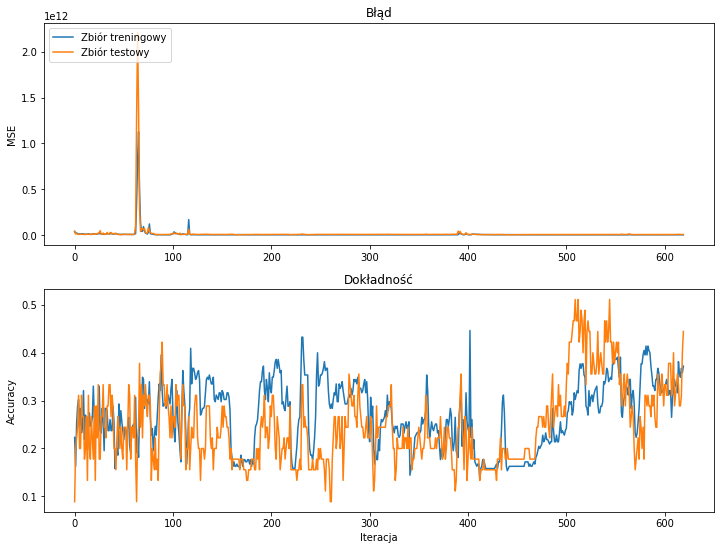

In [19]:
iteracje =620
liczba_wejść = 48
liczba_wyjść = 4

zb_test = len(lista_test)
zb_test = str(zb_test)
iteracje_str = str(iteracje)
liczba_wejść_str = str(liczba_wejść)
liczba_wejść_str
liczba_wyjść_str = str(liczba_wyjść)
now = datetime.now()
teraz = now.strftime("%H_%M_%S")

#model
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], n_features))
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape = (liczba_in, n_features) ))
model.add(LSTM(100, activation='relu'))
model.add(Dense(liczba_out))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X, y, epochs=iteracje, verbose=0, validation_data=(X_valid, y_valid))
model.summary
print(teraz+' GOTOWE: ' + zb_test + '_' + iteracje_str + '_' + liczba_wejść_str +'_'+ liczba_wyjść_str)


#wykres
f = pyplot.figure(figsize=(12, 9))
pyplot.subplot(211)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
#pyplot.xlabel('Iteracja')
pyplot.ylabel('MSE')
pyplot.legend(['Zbiór treningowy', 'Zbiór testowy'], loc='upper left')
pyplot.title('Błąd')
pyplot.subplot(212)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.xlabel('Iteracja')
pyplot.ylabel('Accuracy')
#pyplot.legend(['Zbiór treningowy', 'Zbiór testowy'], loc='upper right')
pyplot.title('Dokładność')
#zapisanie rysunku i modelu
f.savefig('C:/Users/Laptop/Desktop/Grypa/Obrazki/LSTM/'+ teraz +'_LSTM_' + zb_test +'_'+ iteracje_str + '_' + liczba_wejść_str + '_' + liczba_wyjść_str +'.png' , dpi=200)
model.save('C:/Users/Laptop/Desktop/Grypa/Modele/' + teraz + '_LSTM_' + zb_test +'_'+ iteracje_str + '_' + liczba_wejść_str + '_' + liczba_wyjść_str + '.h5')


In [51]:
#testowanie
wynik_zbioru_testowego = []
Tabela_MSE = pd.DataFrame()
Tabela_MSE['Model'] = ""
Tabela_MSE['MSE'] = ""
for x in zbior:
    x_input = array(x)
    x_input = x_input.reshape((1, liczba_in, n_features))
    wynik = model.predict(x_input, verbose=0)
    #print(wynik)
    wynik_flat = wynik.flatten()
    wynik_list = wynik_flat.tolist()
    wynik_zbioru_testowego.extend(wynik_list)
print('Wszystkie dodatnie:',all(n>0 for n in wynik_list) )
wynik_zbioru_testowego = [round(x) for x in wynik_zbioru_testowego]

#wynik_zbioru_testowego
tab_wyn = pd.DataFrame()
tab_wyn['Oczekiwane'] = test_19['Total']
nazwa_kolumny = zb_test + '_' + iteracje_str + '_' + liczba_wejść_str +'_'+ liczba_wyjść_str
tab_wyn[nazwa_kolumny] = wynik_zbioru_testowego
tab_wyn['error'] = tab_wyn['Oczekiwane'] - tab_wyn[nazwa_kolumny]
tab_wyn['error^2'] = tab_wyn['error']**2
MSE = sum(tab_wyn['error^2'])/96
MSE = round(MSE)
nazwa_modelu = teraz +'___'+  zb_test + '_' + iteracje_str + '_' + liczba_wejść_str +'_'+ liczba_wyjść_str
wyniki += [nazwa_modelu, MSE]
print('MSE = ', f"{MSE:,d}")
tab_wyn.to_csv('C:/Users/Laptop/Desktop/Grypa/tabele_wynikowe/' + teraz + nazwa_kolumny + 'tab_wyn.csv')

Wszystkie dodatnie: True
MSE =  1,920,197,936


In [24]:
wyniki

['05_53_06___96_500_48_4',
 1088753474,
 '05_53_06___96_800_48_4',
 6404018607,
 '05_53_06___96_630_48_4',
 5743437486,
 '05_53_06___96_430_48_4',
 967682559,
 '05_53_06___96_330_48_4',
 2498546646,
 '05_53_06___96_380_48_4',
 2186606684,
 '06_20_54___96_440_48_4',
 5863894692,
 '06_24_19___96_200_48_4',
 8607777207,
 '06_27_05___96_420_48_4',
 1941519090]